In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [55]:
data=pd.read_csv(r"C:\Users\rudra\Downloads\Orders.csv")
data.head(2)

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2024,Jayant,Uttar Pradesh,Mathura
1,B-25993,03-02-2024,Lomesh,Delhi,Delhi


In [57]:
data.isnull().sum()
data.duplicated().sum()

0

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [63]:
data['Order Date']=pd.to_datetime(data['Order Date'],format='%d-%m-%Y')

In [65]:
data.head(2)

,Order ID,Order Date,CustomerName,State,City
0,B-26055,2024-03-10,Jayant,Uttar Pradesh,Mathura
1,B-25993,2024-02-03,Lomesh,Delhi,Delhi


## Month and Day Extract 

In [68]:
data['Day']=data['Order Date'].dt.day_name()
data['Month']=data['Order Date'].dt.month_name()

In [70]:
data.head(2)

,Order ID,Order Date,CustomerName,State,City,Day,Month
0,B-26055,2024-03-10,Jayant,Uttar Pradesh,Mathura,Sunday,March
1,B-25993,2024-02-03,Lomesh,Delhi,Delhi,Saturday,February


In [76]:
data['Day_part']=np.where(data['Order Date'].dt.day_name().isin(['Saturday','Sunday']),'Weekend','Weekday')
data.head(2)

,Order ID,Order Date,CustomerName,State,City,Day,Month,Day_part
0,B-26055,2024-03-10,Jayant,Uttar Pradesh,Mathura,Sunday,March,Weekend
1,B-25993,2024-02-03,Lomesh,Delhi,Delhi,Saturday,February,Weekend


In [78]:
data2=pd.read_csv(r"C:\Users\rudra\Downloads\Products.csv")
data2.head(2)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI


## Merge  Order And Product Dataset

In [91]:
dataset=pd.merge(data,data2,left_on='Order ID',right_on='Order ID',how='inner')
dataset.head(2)

,Order ID,Order Date,CustomerName,State,City,Day,Month,Day_part,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,2024-03-10,Jayant,Uttar Pradesh,Mathura,Sunday,March,Weekend,5729,64,14,Furniture,Chairs,EMI
1,B-26055,2024-03-10,Jayant,Uttar Pradesh,Mathura,Sunday,March,Weekend,671,114,9,Electronics,Phones,Credit Card


## Kpi Requirments


In [108]:
Total_amount=round(dataset['Amount'].sum(),0)
Total_quantity=dataset['Quantity'].sum()
Total_profit=dataset['Profit'].sum()
Avg_odr_value=round(dataset['Amount'].sum()/dataset['Order ID'].nunique(),0)
print("Total Amount is: ",Total_amount)
print("Total quantity sold: ",Total_quantity)
print("Total profit is: ",Total_profit)
print("Average order value: ",Avg_odr_value)

Total Amount is:  437771
Total quantity sold:  5615
Total profit is:  36963
Average order value:  876.0


## Profit/Loss by month 

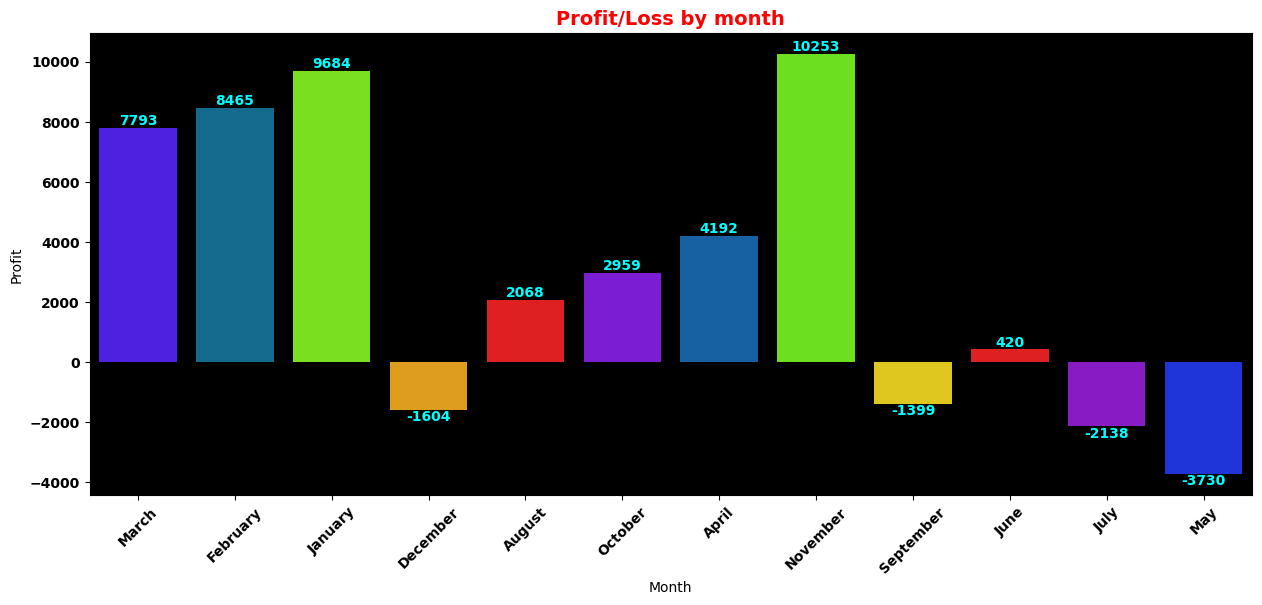

In [188]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data=dataset,x='Month',y='Profit',estimator=sum,ci=0,palette='prism')
for c in ax.containers:
    plt.bar_label(c,color='cyan',fontweight='bold')
ax.set_facecolor("k")
plt.title("Profit/Loss by month",color='r',fontweight='bold',fontsize=14)
plt.xticks(color='k',fontweight='bold',rotation=45)
plt.yticks(color='k',fontweight='bold')
plt.show()

## Top 5 Products Category

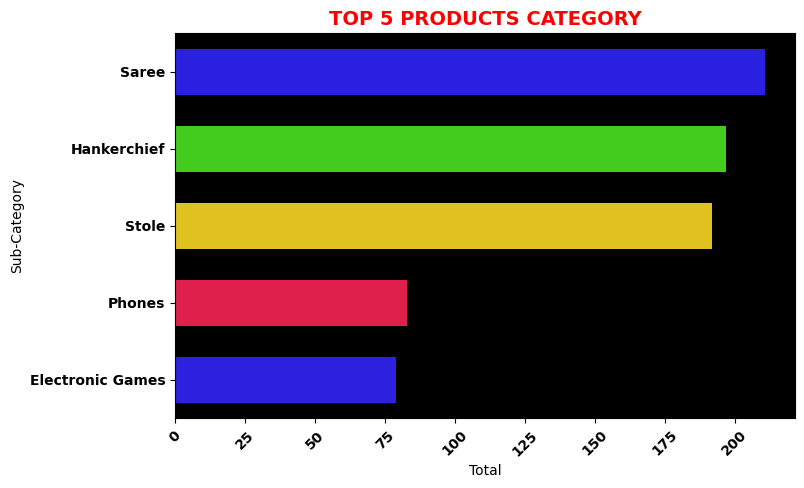

In [265]:
top_5=dataset.groupby('Sub-Category').agg(Total=('Sub-Category','count')).sort_values('Total',ascending=False).reset_index().head(5)
plt.figure(figsize=(8,5))
ax=sns.barplot(data=top_5,y='Sub-Category',x='Total',width=0.6,palette='prism')
ax.set_facecolor("k")
plt.title("TOP 5 PRODUCTS CATEGORY",color='r',fontweight='bold',fontsize=14)
plt.xticks(color='k',fontweight='bold',rotation=45)
plt.yticks(color='k',fontweight='bold')
plt.show()

## Quantity by Category

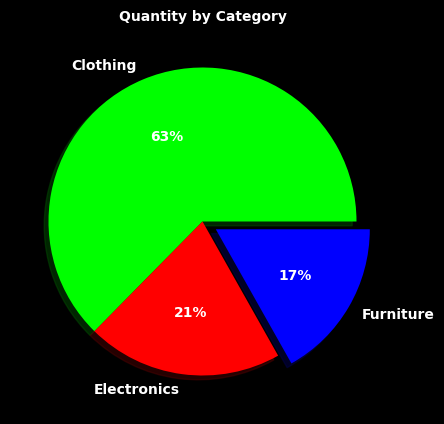

In [383]:
gp=dataset.groupby('Category').agg(Total=('Quantity','sum')).sort_values('Total',ascending=False).reset_index()
plt.figure(figsize=(10,5),facecolor=("k"))
plt.pie(gp['Total'],labels=gp['Category'],autopct="%0.0f%%",shadow=True,colors=['#00FF00','r','b'],explode=[0,0,0.1],
       textprops={'color':'w','fontweight':'bold'})
plt.title("Quantity by Category",color='w',fontweight='bold',fontsize=10)
plt.show()

## Payment mode Percentage

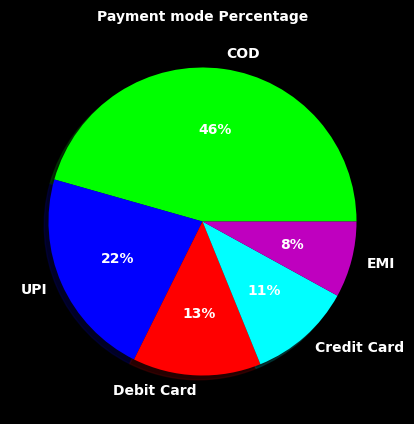

In [385]:
gp=dataset.groupby('PaymentMode').agg(Total=('Order ID','count')).sort_values('Total',ascending=False).reset_index()
plt.figure(figsize=(10,5),facecolor=("k"))
plt.pie(gp['Total'],labels=gp['PaymentMode'],autopct="%0.0f%%",shadow=True,colors=['#00FF00','b','r','cyan','m'],explode=[0,0,0,0,0],
       textprops={'color':'w','fontweight':'bold'})
plt.title("Payment mode Percentage",color='w',fontweight='bold',fontsize=10)
plt.show()

## Top 5 States By Amount

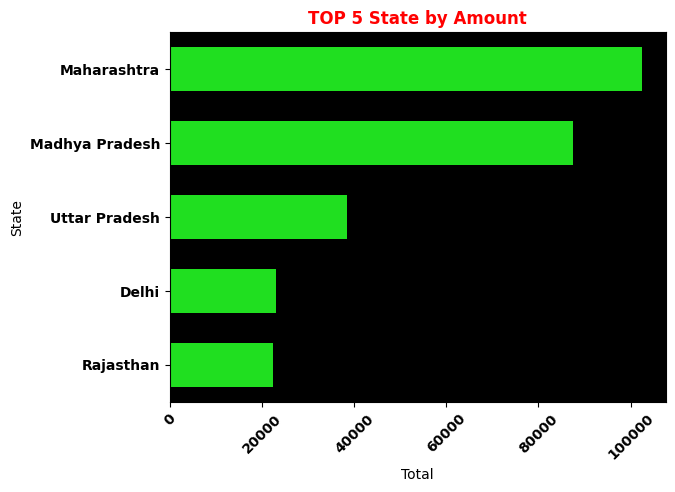

In [391]:
gp=dataset.groupby('State').agg(Total=('Amount','sum')).sort_values('Total',ascending=False).reset_index().head(5)
ax=sns.barplot(data=gp,y='State',x='Total',width=0.6,color='#00FF00')
ax.set_facecolor("k")
plt.title("TOP 5 State by Amount",color='r',fontweight='bold',fontsize=12)
plt.xticks(color='k',fontweight='bold',rotation=45)
plt.yticks(color='k',fontweight='bold')
plt.show()

## Top 5 Customers

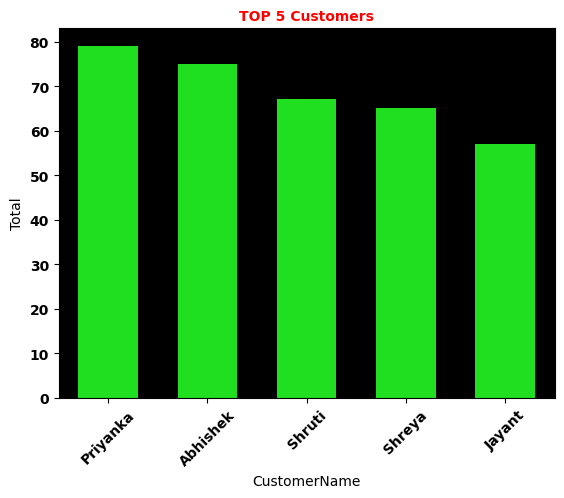

In [408]:
gp=dataset.groupby("CustomerName").agg(Total=("Quantity","sum")).sort_values('Total',ascending=False).head(5)
ax=sns.barplot(data=gp,x='CustomerName',y='Total',width=0.6,color='#00FF00')
ax.set_facecolor("k")
plt.title("TOP 5 Customers",color='r',fontweight='bold',fontsize=10)
plt.xticks(color='k',fontweight='bold',rotation=45)
plt.yticks(color='k',fontweight='bold')
plt.show()